In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Step 0: Read the data
athena = pd.read_csv("Athena_survey_data.csv")
athena.head(20)

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,freq.customize,freq.test.world,gg.game.presented,gg.maxprice,rank.WarriorGuild,rank.SeraphGuardians,rank.Evercrest,rank.DevilsGate,rank.Marksman,rank.QuestoftheTitan
0,female,AZ,24,54000,5,6,7,4,6,5,...,4,7,Warrior Guild,50,4,1,3,5,6,2
1,male,FL,18,12000,4,2,5,3,4,6,...,6,6,Warrior Guild,34,5,3,1,4,6,2
2,male,IL,23,41000,7,5,2,5,3,4,...,2,5,Warrior Guild,42,2,1,5,3,4,6
3,male,CA,21,61000,4,3,4,6,1,2,...,5,2,Warrior Guild,55,1,3,5,2,4,6
4,male,FL,25,59000,6,4,3,6,3,2,...,2,4,Evercrest,49,2,1,4,5,3,6
5,male,MI,20,13000,4,1,2,5,3,3,...,2,2,Seraph Guardians,31,2,3,4,1,5,6
6,female,CA,51,82000,4,4,7,5,6,6,...,5,3,Warrior Guild,45,5,1,3,6,4,2
7,male,CA,32,104000,5,6,3,3,5,3,...,2,6,Evercrest,81,5,1,4,6,3,2
8,female,MA,22,37000,4,2,1,5,5,4,...,1,4,Warrior Guild,57,1,4,3,2,6,5
9,male,NJ,20,55000,3,3,6,3,7,7,...,3,5,Warrior Guild,37,3,4,1,5,6,2


In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 799.0 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 20.6 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=f1182895cce433dcc6f26da2141517eb297cecf42c8081783f8bc3ef0d08f463
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
# Step 1: Evaluate the data
# Bartlett's Test of Sphericity (we want p < 0.05 to go ahead)

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(athena.iloc[:, 4:44])
print(f"Bartlett's Test of Sphericity p-value: {p_value}")

# KMO-test (we want overall MSA > 0.6 to go ahead)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(athena.iloc[:, 4:44])
print(f"KMO-test overall MSA: {kmo_model}")

Bartlett's Test of Sphericity p-value: 0.0
KMO-test overall MSA: 0.8701380128313353


In [ ]:
athena.iloc[:, 4:44]

,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,imp.mastery,imp.backstory,imp.dominate,imp.completion,...,enj.guns,enj.gore,enj.blow.up,freq.explore,freq.experiment,freq.study,freq.char.creation,freq.stats,freq.customize,freq.test.world
0,5,6,7,4,6,5,4,5,5,4,...,3,3,3,5,6,3,6,7,4,7
1,4,2,5,3,4,6,5,6,4,1,...,3,5,3,5,7,5,6,3,6,6
2,7,5,2,5,3,4,6,2,6,5,...,2,4,2,1,4,5,1,4,2,5
3,4,3,4,6,1,2,3,2,6,4,...,1,1,2,2,3,4,3,2,5,2
4,6,4,3,6,3,2,6,2,2,2,...,2,3,2,4,5,6,3,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4,3,6,4,4,6,3,5,7,2,...,5,2,3,6,2,4,5,2,5,3
823,6,7,7,6,6,6,4,7,4,6,...,1,2,2,3,5,5,4,5,4,5
824,4,4,3,3,6,7,3,7,6,4,...,3,3,4,5,7,3,4,4,4,5
825,5,6,3,4,4,5,3,3,1,6,...,2,3,2,5,6,4,3,7,4,6


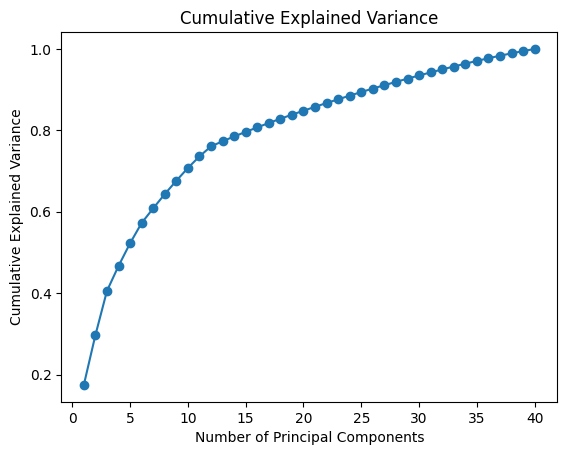

array([6.99670203, 4.88863646, 4.35620131, 2.45163899, 2.23872323,
       1.99262917, 1.44379198, 1.39758246, 1.31343252, 1.25778586,
       1.13573613, 0.99262882, 0.49515349, 0.47821435, 0.44820805,
       0.44104524, 0.43468685, 0.41502891, 0.40116737, 0.3909749 ,
       0.38170652, 0.37762322, 0.36281221, 0.36170064, 0.35245708,
       0.34510457, 0.33208262, 0.32153735, 0.31991887, 0.31195317,
       0.30191319, 0.29213323, 0.28811272, 0.27834207, 0.27342393,
       0.26187468, 0.24805693, 0.23465604, 0.21797911, 0.21506989])

In [ ]:
# Step 2: Determine the number of factors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features (important for PCA)
scaler = StandardScaler()
athena_scaled = scaler.fit_transform(athena.iloc[:, 4:44])

# Create and fit the PCA model
pca = PCA()
pca.fit(athena_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratios.cumsum()

# Plot the explained variance ratios, want the factors to explain
# very roughly 70% or more of the variance
plt.plot(range(1, len(explained_variance_ratios) + 1), \
         cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca.explained_variance_ # eigenvalues; want values > 1

In [ ]:
import statsmodels.api as sm

In [ ]:
# Step 3: Extract the factor solution (with varimax rotation)
from factor_analyzer import Rotator
from sklearn.decomposition import FactorAnalysis

rotator = Rotator()

fa = FactorAnalysis(n_components=11)
fa.fit(athena_scaled)
rotated_loading = rotator.fit_transform(fa.components_.T)

print("Rotated Factor Loadings:")
pd.DataFrame(rotated_loading, columns=['Factor 1', 'Factor 2','Factor 3', 'Factor 4', 'Factor 5','Factor 6','Factor 7','Factor 8','Factor 9','Factor 10','Factor 11'], index=athena.columns[4:44])

Rotated Factor Loadings:


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,Factor 11
imp.challenge,-0.057065,-0.033970,0.277654,-0.126395,-0.164962,0.029388,0.010756,0.094770,-0.029088,-0.027711,-0.731341
imp.unlocks,0.031774,0.130731,-0.088051,-0.114744,0.011919,0.089988,0.801934,0.057604,0.000776,-0.180000,-0.010613
imp.customize,0.198579,-0.064563,0.039728,-0.135150,-0.115172,-0.016081,-0.006651,-0.107246,0.772460,0.009363,0.008098
imp.difficulty,-0.017642,-0.026763,0.252903,-0.141871,-0.147962,0.045795,0.019854,0.086736,0.025699,-0.076325,-0.698530
imp.characters,0.268131,0.093544,0.027395,0.000720,-0.087754,0.023504,-0.035877,-0.798239,0.060898,-0.007502,0.051146
imp.storyline,0.287449,0.061964,0.034096,-0.018182,-0.092673,-0.009830,-0.069905,-0.776210,0.131754,-0.037346,0.070889
imp.mastery,-0.027527,-0.003725,0.571013,-0.111419,-0.109771,0.041716,-0.088947,0.004515,0.006972,0.035232,-0.460059
imp.backstory,0.271239,0.051746,0.000184,-0.004459,-0.098729,0.049025,-0.022901,-0.802362,0.104061,-0.032856,0.067448
imp.dominate,-0.018153,-0.728811,0.030938,0.002703,-0.052375,-0.157530,-0.107301,0.050590,0.069837,0.121481,-0.025730
imp.completion,0.015298,0.161185,-0.055275,-0.123350,0.040430,0.106480,0.760372,0.047343,-0.026347,-0.201611,0.012979


In [ ]:
import statsmodels.api as sm

In [ ]:
x = pd.DataFrame(rotated_loading, columns=['Factor 1', 'Factor 2','Factor 3', 'Factor 4', 'Factor 5','Factor 6','Factor 7','Factor 8','Factor 9','Factor 10','Factor 11'], index=athena.columns[4:44])
x.to_csv("final_factors.csv")

In [ ]:
X = athena.drop(columns=["gender", "state", "age", "income", 'rank.WarriorGuild', 'rank.SeraphGuardians', 'rank.Evercrest','gg.game.presented',	'gg.maxprice','rank.DevilsGate','rank.Marksman','rank.QuestoftheTitan'])
X

,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,imp.mastery,imp.backstory,imp.dominate,imp.completion,...,enj.guns,enj.gore,enj.blow.up,freq.explore,freq.experiment,freq.study,freq.char.creation,freq.stats,freq.customize,freq.test.world
0,5,6,7,4,6,5,4,5,5,4,...,3,3,3,5,6,3,6,7,4,7
1,4,2,5,3,4,6,5,6,4,1,...,3,5,3,5,7,5,6,3,6,6
2,7,5,2,5,3,4,6,2,6,5,...,2,4,2,1,4,5,1,4,2,5
3,4,3,4,6,1,2,3,2,6,4,...,1,1,2,2,3,4,3,2,5,2
4,6,4,3,6,3,2,6,2,2,2,...,2,3,2,4,5,6,3,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4,3,6,4,4,6,3,5,7,2,...,5,2,3,6,2,4,5,2,5,3
823,6,7,7,6,6,6,4,7,4,6,...,1,2,2,3,5,5,4,5,4,5
824,4,4,3,3,6,7,3,7,6,4,...,3,3,4,5,7,3,4,4,4,5
825,5,6,3,4,4,5,3,3,1,6,...,2,3,2,5,6,4,3,7,4,6


In [ ]:
import statsmodels.api as sm

# Define your independent variables (X)
X_c = sm.add_constant(X)  # Add a constant for the intercept

# Ensure the y variables are defined correctly
y1 = athena['rank.WarriorGuild']
y2 = athena['rank.SeraphGuardians']
y3 = athena['rank.Evercrest']

# Check the shape of X_c
print(X_c.shape)

# Fit the regression models for each dependent variable
model1 = sm.OLS(y1, X_c).fit()
model2 = sm.OLS(y2, X_c).fit()
model3 = sm.OLS(y3, X_c).fit()

# Print the summaries
print(model1.summary())
print(model2.summary())
print(model3.summary())

(827, 41)
                            OLS Regression Results                            
Dep. Variable:      rank.WarriorGuild   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     45.63
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.63e-176
Time:                        17:45:07   Log-Likelihood:                -1044.2
No. Observations:                 827   AIC:                             2170.
Df Residuals:                     786   BIC:                             2364.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1

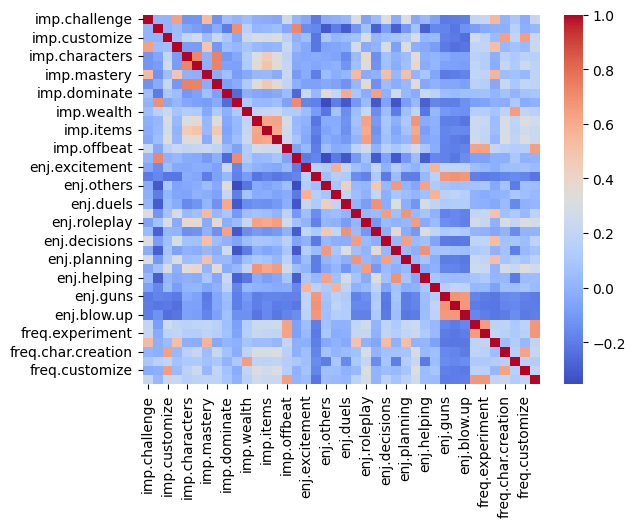

In [ ]:
#2
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X is the design matrix of your variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Identify variables with high VIF values
high_vif_variables = vif_data[vif_data["VIF"] > 5]
high_vif_variables.sort_values(by='VIF', ascending=False).head(10)

,Variable,VIF
7,imp.backstory,24.724591
5,imp.storyline,24.674099
4,imp.characters,23.280423
12,imp.items,19.452278
27,enj.immersion,19.187988
13,imp.power,17.819808
6,imp.mastery,17.522410
22,enj.roleplay,17.442988
11,imp.fantasy,17.346780
0,imp.challenge,16.791671


In [ ]:
# Step 4: Create and name the factor scores
factor_scores = fa.transform(athena_scaled)
athena['Fantasy Empowerment'] = factor_scores[:, 0]
athena['Solo Players'] = factor_scores[:, 1]
athena['Strategic Mastery'] = factor_scores[:, 2]
athena['Intense Action and Violence'] = factor_scores[:, 3]
athena['Conventional Gameplay Preference'] = factor_scores[:, 4]
athena['Slow-paced and Engaging Gameplay'] = factor_scores[:, 5]
athena['Completionist and collection driven'] = factor_scores[:, 6]
athena['Averse to Elaborate Narratives'] = factor_scores[:, 7]
athena['Enthusiastic Customizers'] = factor_scores[:, 8]
athena['Collaborative Gamers'] = factor_scores[:, 9]
athena['Casual and Relaxed Gamers'] = factor_scores[:, 10]
athena

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Solo Players,Strategic Mastery,Intense Action and Violence,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers
0,female,AZ,24,54000,5,6,7,4,6,5,...,-0.533530,-0.056870,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491
1,male,FL,18,12000,4,2,5,3,4,6,...,-1.354620,-0.241895,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556
2,male,IL,23,41000,7,5,2,5,3,4,...,-0.011850,1.167330,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209
3,male,CA,21,61000,4,3,4,6,1,2,...,-0.052906,1.135487,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287
4,male,FL,25,59000,6,4,3,6,3,2,...,-0.424006,1.988822,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,-1.528245,-0.647683,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200
823,female,CA,24,34000,6,7,7,6,6,6,...,0.627132,0.366465,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353
824,female,LA,20,25000,4,4,3,3,6,7,...,-1.336635,-0.802091,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715
825,male,IL,25,56000,5,6,3,4,4,5,...,1.310277,0.788660,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579


In [ ]:
athena.to_excel('athena_factors.xlsx', index=False)

In [ ]:
# Your code to get rotated_loading DataFrame
athena_factors = pd.DataFrame(athena, columns=['Fantasy Empowerment - immersive world with weapons','Solo Players','Strategic Mastery','Intense Action and Violence','Conventional Gameplay Preference','Relaxed and Engaging Gameplay','Completionist and collection driven','Averse to Elaborate Narratives', 'Enthusiastic Customizers','Collaborative Gamers','Casual and Relaxed Gamers'])

# Assuming X is your rotated_loading DataFrame
X = athena_factors

# Assuming y is your dependent variable 'mvliking'
y1 = athena['rank.WarriorGuild']
y2 = athena['rank.SeraphGuardians']
y3 = athena['rank.Evercrest']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression models for each dependent variable
model1 = sm.OLS(y1, X_c).fit()
model2 = sm.OLS(y2, X_c).fit()
model3 = sm.OLS(y3, X_c).fit()


# Print the summaries
print(model1.summary())
print(model2.summary())
print(model3.summary())


NameError: ignored

CLUSTER ANALYSIS

<ipython-input-11-d6d8e924708c>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(dissimilarity_matrix, method="ward")


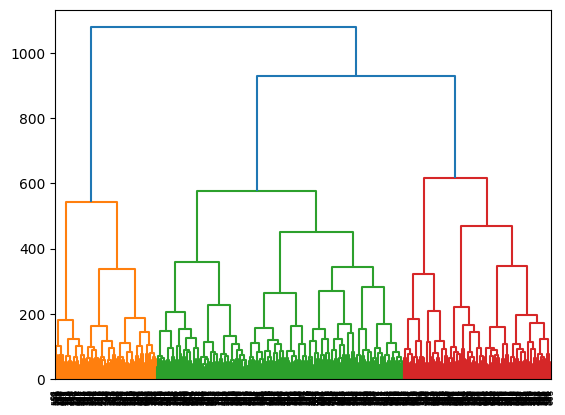

In [ ]:
# Step 1: determine the number of clusters
# Option A: dendogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
dissimilarity_matrix = squareform(pdist(athena.iloc[:, 4:44], metric='euclidean'))

# perform hierarchical clustering using Ward's method on this matrix
hc = linkage(dissimilarity_matrix, method="ward")

# plot the resulting dendrogram
dendrogram(hc, leaf_font_size=6)
plt.show()

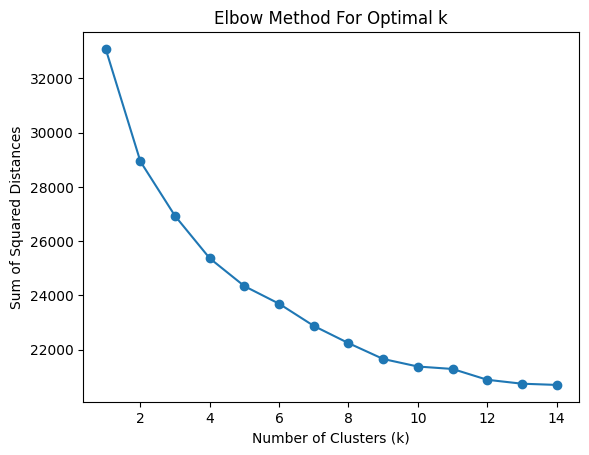

In [ ]:
#4
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 15)  # You can adjust this range based on your problem
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(athena_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [ ]:
athena.iloc[:, 52:63]

,Fantasy Empowerment,Solo Players,Strategic Mastery,Intense Action and Violence,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers
0,1.160885,-0.533530,-0.056870,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491
1,0.838951,-1.354620,-0.241895,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556
2,-0.637219,-0.011850,1.167330,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209
3,-0.732580,-0.052906,1.135487,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287
4,-0.176456,-0.424006,1.988822,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558
...,...,...,...,...,...,...,...,...,...,...,...
822,0.157934,-1.528245,-0.647683,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200
823,1.290947,0.627132,0.366465,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353
824,1.180686,-1.336635,-0.802091,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715
825,0.173202,1.310277,0.788660,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579


In [ ]:
# Step 2: Calculate the final cluster solution
kmeans = KMeans(n_clusters=8, random_state=11, n_init='auto')
athena10 = athena
# Add a new column with cluster assignment for each person
athena10['Cluster'] = kmeans.fit_predict(athena.iloc[:, 52:63])
athena10

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Strategic Mastery,Intense Action and Violence,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers,Cluster
0,female,AZ,24,54000,5,6,7,4,6,5,...,-0.056870,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491,2
1,male,FL,18,12000,4,2,5,3,4,6,...,-0.241895,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556,7
2,male,IL,23,41000,7,5,2,5,3,4,...,1.167330,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209,5
3,male,CA,21,61000,4,3,4,6,1,2,...,1.135487,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287,1
4,male,FL,25,59000,6,4,3,6,3,2,...,1.988822,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,-0.647683,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200,2
823,female,CA,24,34000,6,7,7,6,6,6,...,0.366465,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353,4
824,female,LA,20,25000,4,4,3,3,6,7,...,-0.802091,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715,2
825,male,IL,25,56000,5,6,3,4,4,5,...,0.788660,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579,6


In [ ]:
athena10['Cluster'].value_counts()

2    125
7    122
1    109
0     99
4     97
5     96
3     96
6     83
Name: Cluster, dtype: int64

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def xtab(d1, d2):
    crosstab = pd.crosstab(index=d1, columns=d2)
    chi2, p, _, expected = chi2_contingency(crosstab)
    contributions = (crosstab - expected) ** 2 / expected

    # Create a multi-index DataFrame
    index = pd.MultiIndex.from_product([crosstab.index, ['Observed', 'Expected', 'Chi squared']])
    columns = pd.MultiIndex.from_product([crosstab.columns])

    df = pd.DataFrame(index=index, columns=columns)

    # Fill in the DataFrame
    df.loc[crosstab.index, 'Observed', :] = crosstab.values
    df.loc[crosstab.index, 'Expected', :] = expected.round(2)
    df.loc[crosstab.index, 'Chi squared', :] = contributions.values.round(2)

    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")
    return(df)

In [ ]:
xtab(athena10['rank.WarriorGuild'], athena10['Cluster'])

In [ ]:
# Step 3: Interpret the K-means output
print("Cluster Centers:")
pd.DataFrame(kmeans.cluster_centers_, columns=athena.columns[4:44], \
             index=['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'], )

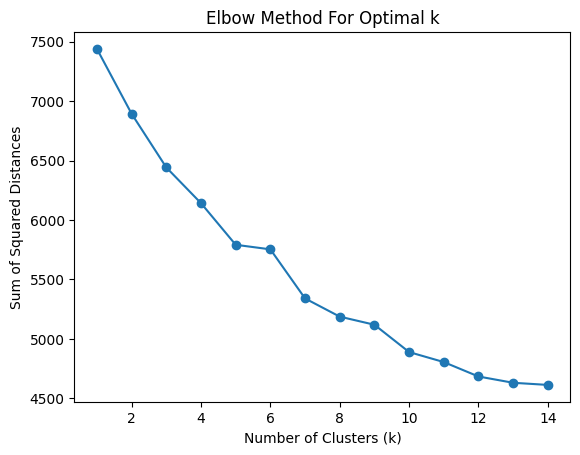

In [ ]:
# Option B: The Elbow
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 15)  # You can adjust this range based on your problem
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(athena.iloc[:,52:63])
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [ ]:
athena.iloc[:, 52:63]

,Fantasy Empowerment,Solo Players,Strategic Mastery,Intense Action and Violence,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers
0,1.160885,-0.533530,-0.056870,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491
1,0.838951,-1.354620,-0.241895,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556
2,-0.637219,-0.011850,1.167330,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209
3,-0.732580,-0.052906,1.135487,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287
4,-0.176456,-0.424006,1.988822,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558
...,...,...,...,...,...,...,...,...,...,...,...
822,0.157934,-1.528245,-0.647683,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200
823,1.290947,0.627132,0.366465,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353
824,1.180686,-1.336635,-0.802091,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715
825,0.173202,1.310277,0.788660,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579


In [ ]:
# Step 2: Calculate the final cluster solution

kmeans = KMeans(n_clusters=5, random_state=11, n_init='auto')
athena5 = athena
# Add a new column with cluster assignment for each person
athena5['Cluster'] = kmeans.fit_predict(athena.iloc[:, 52:63])
athena5

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Strategic Mastery,Intense Action and Violence,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers,Cluster
0,female,AZ,24,54000,5,6,7,4,6,5,...,-0.056870,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491,2
1,male,FL,18,12000,4,2,5,3,4,6,...,-0.241895,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556,2
2,male,IL,23,41000,7,5,2,5,3,4,...,1.167330,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209,4
3,male,CA,21,61000,4,3,4,6,1,2,...,1.135487,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287,1
4,male,FL,25,59000,6,4,3,6,3,2,...,1.988822,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,-0.647683,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200,2
823,female,CA,24,34000,6,7,7,6,6,6,...,0.366465,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353,3
824,female,LA,20,25000,4,4,3,3,6,7,...,-0.802091,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715,2
825,male,IL,25,56000,5,6,3,4,4,5,...,0.788660,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579,3


In [ ]:
athena5.to_excel('athena5.xlsx', index=False)

In [ ]:
# Step 3: Interpret the K-means output
print("Cluster Centers:")
cluster = pd.DataFrame(kmeans.cluster_centers_, columns=athena.columns[52:63], \
             index=['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4'], )
cluster

Cluster Centers:


,Fantasy Empowerment,Solo Players,Strategic Mastery,Intense Action and Violence,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers
Cluster 0,-0.873637,0.021871,-0.777755,1.174751,-0.014535,-0.070002,0.109999,-0.007986,-0.084569,0.062843,-0.043474
Cluster 1,-0.716224,0.514879,-0.193751,-0.937146,0.209360,-0.189985,0.162398,-0.139443,0.204987,-0.043925,0.102637
Cluster 2,0.569094,-0.957430,-0.267078,-0.231921,0.210124,0.497640,0.351483,-0.129713,0.027276,0.010934,-0.048150
Cluster 3,1.078023,0.643490,-0.265981,0.027275,-0.341994,-0.328388,-0.205675,-0.068054,-0.141332,-0.034534,0.001066
Cluster 4,-0.309454,-0.205155,1.216477,0.204957,-0.043608,0.072464,-0.349647,0.314945,-0.013848,0.018290,-0.017742


In [ ]:
cluster.to_excel('cluster_5.xlsx', index=False)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
#from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
# Add labels to the gender and cluster
athena5['gender'] = athena5['gender'].replace({0: 'male', 1: 'female'})
athena5['Cluster'] = athena5['Cluster'].replace({0: 'Adrenaline Gamers', 1: 'Non-Violent Traditionalists', 2: 'Multi-player Explorers', 3: 'Fantasy Soloists', 4: 'Strategic Connoisseurs'})
athena5

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Strategic Mastery,Intense Action and Violence,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers,Cluster
0,female,AZ,24,54000,5,6,7,4,6,5,...,-0.056870,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491,Multi-player Explorers
1,male,FL,18,12000,4,2,5,3,4,6,...,-0.241895,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556,Multi-player Explorers
2,male,IL,23,41000,7,5,2,5,3,4,...,1.167330,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209,Strategic Connoisseurs
3,male,CA,21,61000,4,3,4,6,1,2,...,1.135487,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287,Non-Violent Traditionalists
4,male,FL,25,59000,6,4,3,6,3,2,...,1.988822,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558,Strategic Connoisseurs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,-0.647683,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200,Multi-player Explorers
823,female,CA,24,34000,6,7,7,6,6,6,...,0.366465,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353,Fantasy Soloists
824,female,LA,20,25000,4,4,3,3,6,7,...,-0.802091,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715,Multi-player Explorers
825,male,IL,25,56000,5,6,3,4,4,5,...,0.788660,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579,Fantasy Soloists


In [ ]:
tab = pd.crosstab(index=athena5['gender'], columns='frequency', margins=True, margins_name='Total')
tab['proportion'] = tab['frequency'] / tab.loc['Total', 'frequency']
tab.round(4)

col_0,frequency,Total,proportion
gender,,,
female,377,377,0.4559
male,437,437,0.5284
nonbinary,13,13,0.0157
Total,827,827,1.0000


In [ ]:
# Crosstabulation by cluster and gender
tab = pd.crosstab(index=athena5['gender'], columns=athena5['Cluster'], margins=True, margins_name='Total')

# Calculate proportion by cluster
tab_proportion = tab.div(tab.loc['Total'], axis=1).round(4)

# Display the cross-tabulation by cluster with proportions
print(tab_proportion)

Cluster    Adrenaline Gamers  Fantasy Soloists  Multi-player Explorers  \
gender                                                                   
female                0.4186            0.4520                  0.5439   
male                  0.5581            0.5311                  0.4503   
nonbinary             0.0233            0.0169                  0.0058   
Total                 1.0000            1.0000                  1.0000   

Cluster    Non-Violent Traditionalists  Strategic Connoisseurs   Total  
gender                                                                  
female                          0.4364                  0.4216  0.4559  
male                            0.5576                  0.5514  0.5284  
nonbinary                       0.0061                  0.0270  0.0157  
Total                           1.0000                  1.0000  1.0000  


In [ ]:
# Crosstabulation by cluster and gender
tab = pd.crosstab(index=athena5['gender'], columns=athena5['Cluster'], margins=True, margins_name='Total')

# Calculate proportion by cluster
tab_proportion = tab.div(tab.loc['Total'], axis=1).round(4)

# Display the cross-tabulation by cluster with count and proportions
print("Count by Cluster:")
tab


Count by Cluster:


Cluster,Adrenaline Gamers,Fantasy Soloists,Multi-player Explorers,Non-Violent Traditionalists,Strategic Connoisseurs,Total
gender,,,,,,
female,54,80,93,72,78,377
male,72,94,77,92,102,437
nonbinary,3,3,1,1,5,13
Total,129,177,171,165,185,827


In [ ]:
def xtab(d1, d2):
    crosstab = pd.crosstab(index=d1, columns=d2)
    chi2, p, _, expected = chi2_contingency(crosstab)
    contributions = (crosstab - expected) ** 2 / expected

    # Calculate proportions
    proportions = crosstab.div(crosstab.sum(axis=1), axis=0).round(4)

    # Create a multi-index DataFrame
    index = pd.MultiIndex.from_product([['Count', 'Proportion'], crosstab.index])
    columns = pd.MultiIndex.from_product([['Cluster'], crosstab.columns])

    df = pd.DataFrame(index=index, columns=columns)

    # Fill in the DataFrame
    df.loc['Count', :] = crosstab.values
    df.loc['Proportion', :] = proportions.values

    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")
    return df

# Use xtab to generate the cross-tabulation of gender by cluster
xtab(athena5['gender'], athena5['Cluster'])


Chi-squared value: 10.586772060306407
P-value: 0.226229918930682


Cluster                   \
Cluster              Adrenaline Gamers Fantasy Soloists   
           gender                                         
Count      female                   54               80   
           male                     72               94   
           nonbinary                 3                3   
Proportion female               0.1432           0.2122   
           male                 0.1648           0.2151   
           nonbinary            0.2308           0.2308   

                                                                         \
Cluster              Multi-player Explorers Non-Violent Traditionalists   
           gender                                                         
Count      female                        93                          72   
           male                          77                          92   
           nonbinary                      1                           1   
Proportion female                    0.2467                       0.191   
           male                      0.1762                      0.2105   
           nonbinary                 0.0769                      0.0769   

                                             
Cluster              Strategic Connoisseurs  
           gender                            
Count      female                        78  
           male                         102  
           nonbinary                      5  
Proportion female                    0.2069  
           male                      0.2334  
           nonbinary                 0.3846

In [ ]:
def xtab(d1, d2):
    crosstab = pd.crosstab(index=d1, columns=d2)
    chi2, p, _, expected = chi2_contingency(crosstab)
    contributions = (crosstab - expected) ** 2 / expected

    # Create a multi-index DataFrame
    index = pd.MultiIndex.from_product([crosstab.index, ['Observed', 'Expected', 'Chi squared']])
    columns = pd.MultiIndex.from_product([crosstab.columns])

    df = pd.DataFrame(index=index, columns=columns)

    # Fill in the DataFrame
    df.loc[crosstab.index, 'Observed', :] = crosstab.values
    df.loc[crosstab.index, 'Expected', :] = expected.round(2)
    df.loc[crosstab.index, 'Chi squared', :] = contributions.values.round(2)

    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")
    return(df)

In [ ]:
xtab(athena5['gender'], athena5['Cluster'])

Chi-squared value: 10.586772060306407
P-value: 0.226229918930682


Cluster               Adrenaline Gamers Fantasy Soloists  \
gender                                                     
female    Observed                   54               80   
          Expected                58.81            80.69   
          Chi squared              0.39             0.01   
male      Observed                   72               94   
          Expected                68.17            93.53   
          Chi squared              0.22              0.0   
nonbinary Observed                    3                3   
          Expected                 2.03             2.78   
          Chi squared              0.47             0.02   

Cluster               Multi-player Explorers Non-Violent Traditionalists  \
gender                                                                     
female    Observed                        93                          72   
          Expected                     77.95                       75.22   
          Chi squared                    2.9                        0.14   
male      Observed                        77                          92   
          Expected                     90.36                       87.19   
          Chi squared                   1.98                        0.27   
nonbinary Observed                         1                           1   
          Expected                      2.69                        2.59   
          Chi squared                   1.06                        0.98   

Cluster               Strategic Connoisseurs  
gender                                        
female    Observed                        78  
          Expected                     84.33  
          Chi squared                   0.48  
male      Observed                       102  
          Expected                     97.76  
          Chi squared                   0.18  
nonbinary Observed                         5  
          Expected                      2.91  
          Chi squared                    1.5

In [ ]:
# Crosstab analysis (ageNew)
athena5['ageNew'] = 2
athena5.loc[athena5['age'] <= 2, 'ageNew'] = 1
athena5.loc[athena5['age'] >= 5, 'ageNew'] = 3
athena5['ageNew'] = athena5['ageNew'].replace({1: 'Under 35', 2: '35-54', 3: '55 and over'})
athena5

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Intense Action and Violence,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers,Cluster,ageNew
0,female,AZ,24,54000,5,6,7,4,6,5,...,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491,Multi-player Explorers,55 and over
1,male,FL,18,12000,4,2,5,3,4,6,...,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556,Multi-player Explorers,55 and over
2,male,IL,23,41000,7,5,2,5,3,4,...,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209,Strategic Connoisseurs,55 and over
3,male,CA,21,61000,4,3,4,6,1,2,...,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287,Non-Violent Traditionalists,55 and over
4,male,FL,25,59000,6,4,3,6,3,2,...,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558,Strategic Connoisseurs,55 and over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200,Multi-player Explorers,55 and over
823,female,CA,24,34000,6,7,7,6,6,6,...,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353,Fantasy Soloists,55 and over
824,female,LA,20,25000,4,4,3,3,6,7,...,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715,Multi-player Explorers,55 and over
825,male,IL,25,56000,5,6,3,4,4,5,...,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579,Fantasy Soloists,55 and over


In [ ]:
# Group data by cluster
grouped = athena.groupby('Cluster')

# Calculate summary statistics for each demographic variable
summary_stats = grouped[['age', 'income']].mean()

# Convert the grouped data to a DataFrame
summary_stats_df = pd.DataFrame(summary_stats)

summary_stats_df = summary_stats_df.rename(columns={'age': 'Average Age', 'income': 'Average Income'})

# Display the summary statistics DataFrame
print(summary_stats_df)

                             Average Age  Average Income
Cluster                                                 
Adrenaline Gamers              27.627907    54775.193798
Fantasy Soloists               34.615819    71593.220339
Multi-player Explorers         22.830409    37321.637427
Non-Violent Traditionalists    26.000000    47109.090909
Strategic Connoisseurs         26.232432    48254.054054


In [ ]:
athena5.loc[athena['age'] <=20, 'agegroup'] = 'Highschooler (0-20)'
athena5.loc[(athena['age'] >20) & (athena5['age'] <=35), 'agegroup'] = 'Young Adults (20-35)'
athena5.loc[athena['age'] > 35, 'agegroup'] = 'Adults (35 and above)'
athena5

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers,Cluster,ageNew,agegroup
0,female,AZ,24,54000,5,6,7,4,6,5,...,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491,Multi-player Explorers,55 and over,Young Adults (20-35)
1,male,FL,18,12000,4,2,5,3,4,6,...,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556,Multi-player Explorers,55 and over,Highschooler (0-20)
2,male,IL,23,41000,7,5,2,5,3,4,...,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209,Strategic Connoisseurs,55 and over,Young Adults (20-35)
3,male,CA,21,61000,4,3,4,6,1,2,...,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287,Non-Violent Traditionalists,55 and over,Young Adults (20-35)
4,male,FL,25,59000,6,4,3,6,3,2,...,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558,Strategic Connoisseurs,55 and over,Young Adults (20-35)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200,Multi-player Explorers,55 and over,Young Adults (20-35)
823,female,CA,24,34000,6,7,7,6,6,6,...,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353,Fantasy Soloists,55 and over,Young Adults (20-35)
824,female,LA,20,25000,4,4,3,3,6,7,...,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715,Multi-player Explorers,55 and over,Highschooler (0-20)
825,male,IL,25,56000,5,6,3,4,4,5,...,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579,Fantasy Soloists,55 and over,Young Adults (20-35)


In [ ]:
xtab(athena5['agegroup'], athena5['Cluster'])

Chi-squared value: 126.12488208670158
P-value: 1.7960138881289724e-23


Cluster                           Adrenaline Gamers Fantasy Soloists  \
agegroup                                                               
Adults (35 and above) Observed                   20               64   
                      Expected                18.09            24.83   
                      Chi squared               0.2            61.81   
Highschooler (0-20)   Observed                   25               18   
                      Expected                29.95            41.09   
                      Chi squared              0.82            12.98   
Young Adults (20-35)  Observed                   84               95   
                      Expected                80.96           111.08   
                      Chi squared              0.11             2.33   

Cluster                           Multi-player Explorers  \
agegroup                                                   
Adults (35 and above) Observed                         0   
                      Expected                     23.99   
                      Chi squared                  23.99   
Highschooler (0-20)   Observed                        65   
                      Expected                      39.7   
                      Chi squared                  16.12   
Young Adults (20-35)  Observed                       106   
                      Expected                    107.31   
                      Chi squared                   0.02   

Cluster                           Non-Violent Traditionalists  \
agegroup                                                        
Adults (35 and above) Observed                             15   
                      Expected                          23.14   
                      Chi squared                        2.87   
Highschooler (0-20)   Observed                             43   
                      Expected                          38.31   
                      Chi squared                        0.57   
Young Adults (20-35)  Observed                            107   
                      Expected                         103.55   
                      Chi squared                        0.12   

Cluster                           Strategic Connoisseurs  
agegroup                                                  
Adults (35 and above) Observed                        17  
                      Expected                     25.95  
                      Chi squared                   3.09  
Highschooler (0-20)   Observed                        41  
                      Expected                     42.95  
                      Chi squared                   0.09  
Young Adults (20-35)  Observed                       127  
                      Expected                     116.1  
                      Chi squared                   1.02

In [ ]:
athena5.loc[athena['income'] <=45000, 'incomegroup'] = 'Low Income'
athena5.loc[(athena['income'] >45000) & (athena5['income'] <=90000), 'incomegroup'] = 'Mid Income'
athena5.loc[athena['income'] > 90000, 'incomegroup'] = 'High Income'
athena5

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers,Cluster,ageNew,agegroup,incomegroup
0,female,AZ,24,54000,5,6,7,4,6,5,...,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491,Multi-player Explorers,55 and over,Young Adults (20-35),Mid Income
1,male,FL,18,12000,4,2,5,3,4,6,...,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556,Multi-player Explorers,55 and over,Highschooler (0-20),Low Income
2,male,IL,23,41000,7,5,2,5,3,4,...,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209,Strategic Connoisseurs,55 and over,Young Adults (20-35),Low Income
3,male,CA,21,61000,4,3,4,6,1,2,...,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287,Non-Violent Traditionalists,55 and over,Young Adults (20-35),Mid Income
4,male,FL,25,59000,6,4,3,6,3,2,...,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558,Strategic Connoisseurs,55 and over,Young Adults (20-35),Mid Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200,Multi-player Explorers,55 and over,Young Adults (20-35),Low Income
823,female,CA,24,34000,6,7,7,6,6,6,...,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353,Fantasy Soloists,55 and over,Young Adults (20-35),Low Income
824,female,LA,20,25000,4,4,3,3,6,7,...,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715,Multi-player Explorers,55 and over,Highschooler (0-20),Low Income
825,male,IL,25,56000,5,6,3,4,4,5,...,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579,Fantasy Soloists,55 and over,Young Adults (20-35),Mid Income


In [ ]:
xtab(athena5['incomegroup'], athena5['Cluster'])

Chi-squared value: 106.25219970637757
P-value: 2.2394785731765334e-19


Cluster                 Adrenaline Gamers Fantasy Soloists  \
incomegroup                                                  
High Income Observed                   22               52   
            Expected                17.31            23.76   
            Chi squared              1.27            33.58   
Low Income  Observed                   62               47   
            Expected                65.98            90.53   
            Chi squared              0.24            20.93   
Mid Income  Observed                   45               78   
            Expected                 45.7            62.71   
            Chi squared              0.01             3.73   

Cluster                 Multi-player Explorers Non-Violent Traditionalists  \
incomegroup                                                                  
High Income Observed                         6                          11   
            Expected                     22.95                       22.15   
            Chi squared                  12.52                        5.61   
Low Income  Observed                       127                          89   
            Expected                     87.46                        84.4   
            Chi squared                  17.87                        0.25   
Mid Income  Observed                        38                          65   
            Expected                     60.58                       58.46   
            Chi squared                   8.42                        0.73   

Cluster                 Strategic Connoisseurs  
incomegroup                                     
High Income Observed                        20  
            Expected                     24.83  
            Chi squared                   0.94  
Low Income  Observed                        98  
            Expected                     94.63  
            Chi squared                   0.12  
Mid Income  Observed                        67  
            Expected                     65.54  
            Chi squared                   0.03

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming 'agegroup' and 'Cluster' columns exist in your DataFrame

# Create dummy variables for 'agegroup'
agegroup_dummies = pd.get_dummies(athena5['agegroup'], prefix='agegroup')

# Concatenate the dummy variables with the original DataFrame
athena5_with_dummies = pd.concat([athena5, agegroup_dummies], axis=1)

# Filter out non-numeric values in 'Cluster' column
athena5_numeric = athena5_with_dummies[pd.to_numeric(athena5_with_dummies['Cluster'], errors='coerce').notna()]

# Fit linear regression model
X = athena5_numeric.filter(regex='agegroup_')  # Features (dummy variables for agegroup)
y = athena5_numeric['Cluster'].astype(float)  # Target variable ('Cluster' column converted to float)

# Check if there are enough samples after filtering
model = LinearRegression()
model.fit(X, y)

    # Display coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)



PRICING #4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Filtering data for each game
games = ['Warrior Guild', 'Seraph Guardians', 'Evercrest']
wtp_tables = {}  # Dictionary to hold results for each game

for game in games:
    game_data = athena[athena['gg.game.presented'] == game]

    cumulative_wtp_game = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

    for price in np.arange(min(game_data['gg.maxprice']), max(game_data['gg.maxprice']) + 5, 5):
        num_respondents_wtp = sum(game_data['gg.maxprice'] >= price)
        cumulative_wtp_game = pd.concat([cumulative_wtp_game, pd.DataFrame({
            'price': [price],
            'per_customers_wtp': [num_respondents_wtp / len(game_data)],
            'pred_revenue': [num_respondents_wtp * price]
        })], ignore_index=True)
    wtp_tables[game] = cumulative_wtp_game  # Store the table for this game in the dictionary

wtp_tables6

{'Warrior Guild':    price  per_customers_wtp pred_revenue
 0     18           1.000000         4932
 1     23           0.970803         6118
 2     28           0.934307         7168
 3     33           0.828467         7491
 4     38           0.664234         6916
 5     43           0.525547         6192
 6     48           0.405109         5328
 7     53           0.284672         4134
 8     58           0.204380         3248
 9     63           0.153285         2646
 10    68           0.098540         1836
 11    73           0.072993         1460
 12    78           0.036496          780
 13    83           0.032847          747
 14    88           0.014599          352
 15    93           0.014599          372
 16    98           0.003650           98
 17   103           0.000000            0,
 'Seraph Guardians':    price  per_customers_wtp pred_revenue
 0     15           1.000000         4155
 1     20           0.992780         5500
 2     25           0.967509         6

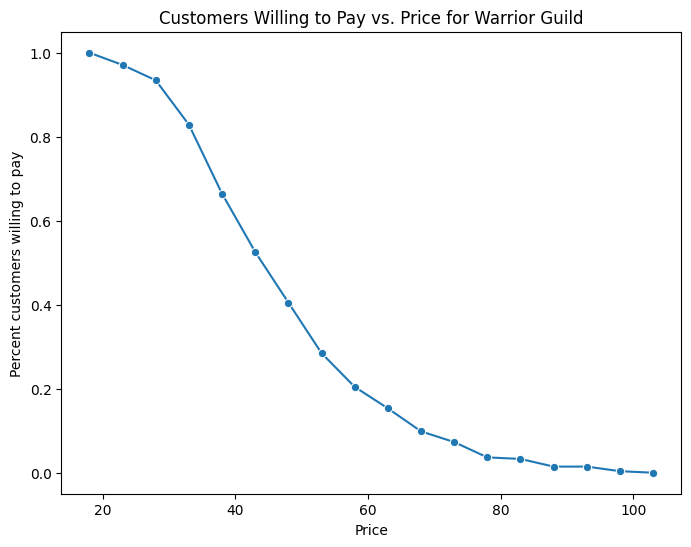

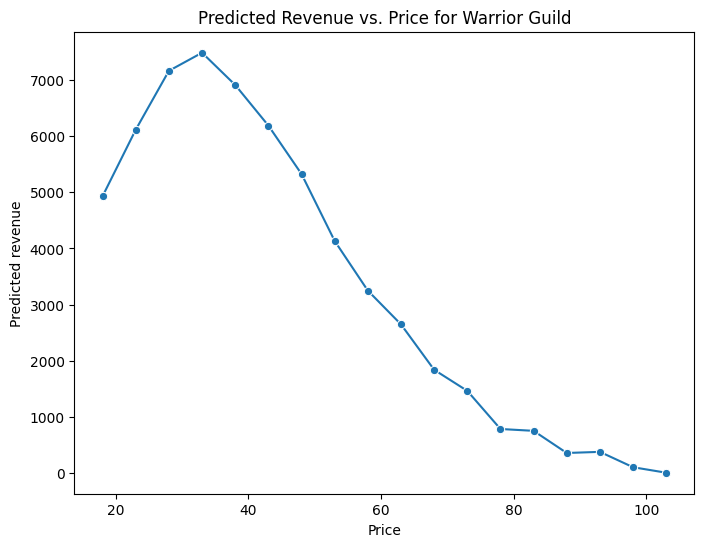

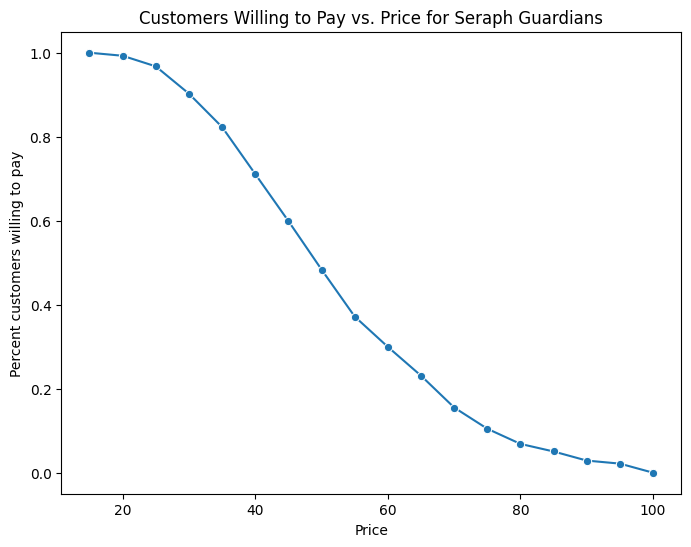

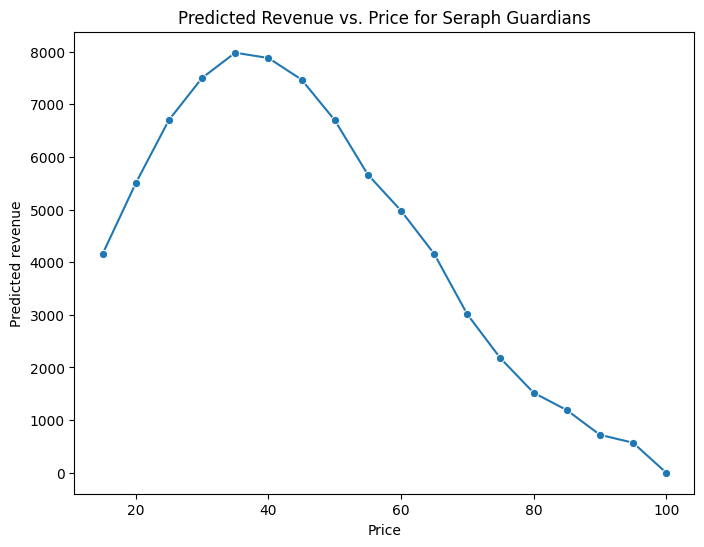

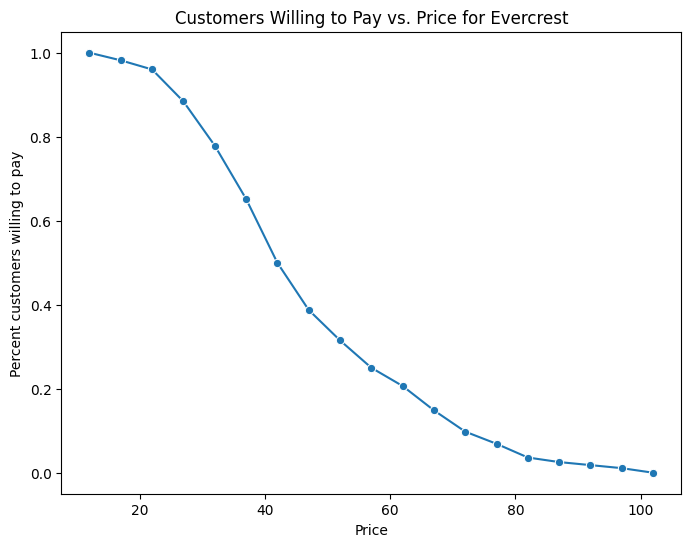

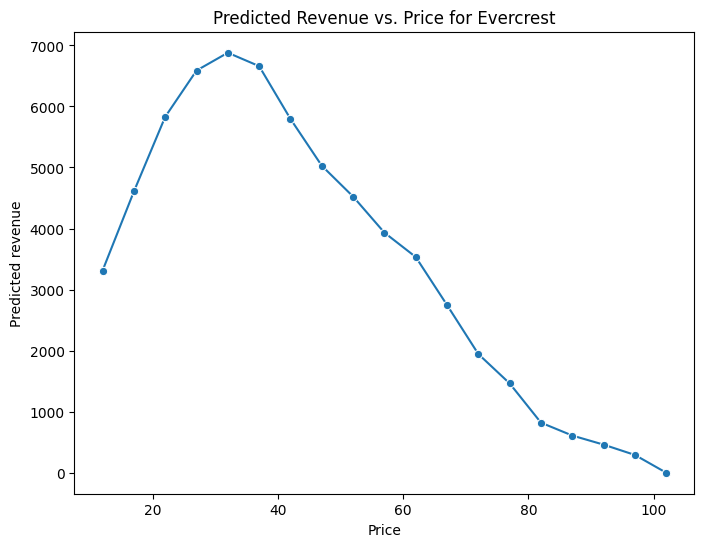

In [ ]:
# Filtering data for each game
games = ['Warrior Guild', 'Seraph Guardians', 'Evercrest']

for game in games:
    game_data = athena[athena['gg.game.presented'] == game]

    cumulative_wtp_game = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

    for price in np.arange(min(game_data['gg.maxprice']), max(game_data['gg.maxprice']) + 5, 5):
        num_respondents_wtp = sum(game_data['gg.maxprice'] >= price)
        cumulative_wtp_game = pd.concat([cumulative_wtp_game, pd.DataFrame({
            'price': [price],
            'per_customers_wtp': [num_respondents_wtp / len(game_data)],
            'pred_revenue': [num_respondents_wtp * price]
        })], ignore_index=True)

    cumulative_wtp_game

    # Plot customers willing to pay for each game
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp_game, marker='o')
    plt.xlabel('Price')
    plt.ylabel('Percent customers willing to pay')
    plt.title(f'Customers Willing to Pay vs. Price for {game}')
    plt.show()

    # Plot predicted revenue for each game
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp_game, marker='o')
    plt.xlabel('Price')
    plt.ylabel('Predicted revenue')
    plt.title(f'Predicted Revenue vs. Price for {game}')
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Separate data for each game
games = ['Warrior Guild', 'Seraph Guardians', 'Evercrest']

for game in games:
    game_data = athena5[athena5['gg.game.presented'] == game]

    # Define features and target variable
    X = game_data[['age', 'income', 'imp.challenge', 'imp.unlocks', 'imp.customize', 'Cluster']]  # Adjust features as needed
    y = game_data['gg.maxprice']

    # Encode categorical variables if needed (e.g., 'Cluster')
    X = pd.get_dummies(X, drop_first=True)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)


    # Extract coefficients
    coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
    print(f"\nGame: {game}")
    print("Coefficients:")
    print(coef_df)

    # Predict 'gg.maxprice' based on demographic attributes and clusters
    predictions = model.predict(X)
    game_data['predicted_price'] = predictions

    # Segment with the highest predicted price (most interested segment)
    most_interested_segment = game_data.loc[game_data['predicted_price'].idxmax()]
    print(f"\nSegment most interested in {game}:")
    print(most_interested_segment)

    # Segment with the lowest predicted price (least interested segment)
    least_interested_segment = game_data.loc[game_data['predicted_price'].idxmin()]
    print(f"\nSegment least interested in {game}:")
    print(least_interested_segment)


Game: Warrior Guild
Coefficients:
                               Feature  Coefficient
0                                  age     0.119486
1                               income     0.000341
2                        imp.challenge     0.696399
3                          imp.unlocks    -0.557185
4                        imp.customize     0.385376
5             Cluster_Fantasy Soloists    -1.039750
6       Cluster_Multi-player Explorers    -1.434856
7  Cluster_Non-Violent Traditionalists    -2.323314
8       Cluster_Strategic Connoisseurs    -4.193257

Segment most interested in Warrior Guild:
gender                                              male
state                                                 MA
age                                                   42
income                                            269000
imp.challenge                                          1
                                        ...             
Collaborative Gamers                            0.345593
Cas

<ipython-input-91-80f12d52fa2e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data['predicted_price'] = predictions
<ipython-input-91-80f12d52fa2e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data['predicted_price'] = predictions
<ipython-input-91-80f12d52fa2e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
athena5

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Intense Action and Violence,Conventional Gameplay Preference,Slow-paced and Engaging Gameplay,Completionist and collection driven,Averse to Elaborate Narratives,Enthusiastic Customizers,Collaborative Gamers,Casual and Relaxed Gamers,Cluster,ageNew
0,female,AZ,24,54000,5,6,7,4,6,5,...,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491,Multi-player Explorers,55 and over
1,male,FL,18,12000,4,2,5,3,4,6,...,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556,Multi-player Explorers,55 and over
2,male,IL,23,41000,7,5,2,5,3,4,...,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209,Strategic Connoisseurs,55 and over
3,male,CA,21,61000,4,3,4,6,1,2,...,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287,Non-Violent Traditionalists,55 and over
4,male,FL,25,59000,6,4,3,6,3,2,...,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558,Strategic Connoisseurs,55 and over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200,Multi-player Explorers,55 and over
823,female,CA,24,34000,6,7,7,6,6,6,...,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353,Fantasy Soloists,55 and over
824,female,LA,20,25000,4,4,3,3,6,7,...,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715,Multi-player Explorers,55 and over
825,male,IL,25,56000,5,6,3,4,4,5,...,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579,Fantasy Soloists,55 and over


In [ ]:
athena5.to_excel('athena_test.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression


games = ['Warrior Guild', 'Evercrest', 'Seraph Guardians']
models = []

for game in games:
    athena_tmp = athena[athena['gg.game.presented'] == game]

    cluster_dummies = pd.get_dummies(athena_tmp['Cluster'])
    X = cluster_dummies
    y = athena_tmp['gg.maxprice']
    model = sm.OLS(y,X).fit()
    models.append(model)
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            gg.maxprice   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     8.626
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.45e-06
Time:                        08:37:14   Log-Likelihood:                -1122.9
No. Observations:                 274   AIC:                             2256.
Df Residuals:                     269   BIC:                             2274.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Adrenaline Gamers 

In [ ]:
counts = athena5[['rank.WarriorGuild', 'rank.SeraphGuardians', 'rank.Evercrest', 'rank.DevilsGate', 'rank.Marksman', 'rank.QuestoftheTitan']].eq(1).sum()

# Total number of respondents
total_respondents = len(athena5)

# Calculating market share for each game
market_share = (counts / total_respondents) * 100


print(market_share)

rank.WarriorGuild       11.970979
rank.SeraphGuardians    53.808948
rank.Evercrest          10.157195
rank.DevilsGate         16.203144
rank.Marksman            1.451028
rank.QuestoftheTitan     6.408706
dtype: float64


In [ ]:
import pandas as pd

# Assuming 30% of respondents will buy more than one game
multiple_game_buyers = 0.3 * total_respondents

# Adjust the total number of respondents considering customers buying more than one game
adjusted_total_respondents = total_respondents - multiple_game_buyers

# Recalculate market share based on the adjusted total respondents
adjusted_market_share = (counts / adjusted_total_respondents) * 100

print("Original Market Share:")
print(market_share)

print("\nAdjusted Market Share (Considering customers buying multiple games):")
print(adjusted_market_share)


Original Market Share:
rank.WarriorGuild       11.970979
rank.SeraphGuardians    53.808948
rank.Evercrest          10.157195
rank.DevilsGate         16.203144
rank.Marksman            1.451028
rank.QuestoftheTitan     6.408706
dtype: float64

Adjusted Market Share (Considering customers buying multiple games):
rank.WarriorGuild       17.101399
rank.SeraphGuardians    76.869926
rank.Evercrest          14.510278
rank.DevilsGate         23.147348
rank.Marksman            2.072897
rank.QuestoftheTitan     9.155295
dtype: float64


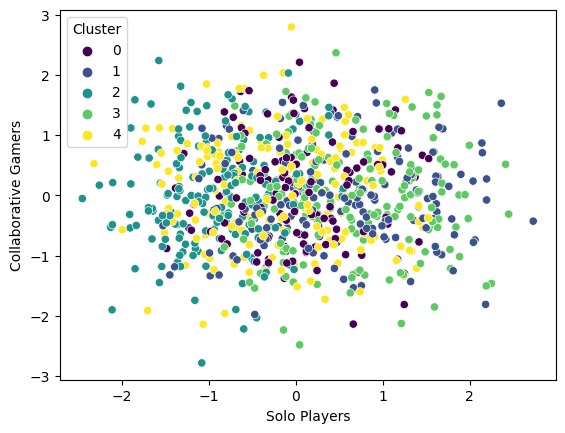

In [ ]:
# Visualize K-means clusters
import seaborn as sns

sns.scatterplot(data=athena, x='Solo Players', y='Collaborative Gamers', hue='Cluster', palette='viridis')
plt.show()

In [ ]:
#5

import pandas as pd

dummy_df = pd.get_dummies(microvan['Cluster'], prefix='Cluster', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
microvan = pd.concat([microvan, dummy_df], axis=1)
microvan

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,...,educ,recycle,Practical and budget conscious,Family oriented with young kids,Luxury and comfort,Performance focused,Environmental and fuel driven,Cluster,Cluster_1,Cluster_2
0,1,4,6,5,2,5,3,4,3,4,...,1,3,0.613662,1.402771,-0.313992,1.385655,0.180439,1,1,0
1,2,6,3,5,3,7,5,5,4,6,...,3,4,0.405003,-1.313711,-1.197669,-0.308085,-0.418347,0,0,0
2,3,3,7,1,5,2,5,4,5,5,...,3,3,-1.321533,0.724571,1.735972,0.070807,-0.824735,2,0,1
3,4,3,3,5,3,6,6,6,6,4,...,3,2,1.328825,-0.432193,-0.259008,-0.911182,1.224103,1,1,0
4,5,1,4,3,6,3,4,6,6,6,...,3,4,0.254523,-0.390356,1.592594,0.256479,-0.462674,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,6,3,6,3,3,5,5,5,4,...,3,3,1.301620,-0.287257,0.207273,-0.429070,0.850330,1,1,0
396,397,1,1,4,1,6,4,4,3,3,...,1,5,2.461792,-1.354624,0.390112,0.419028,-0.639120,1,1,0
397,398,9,4,7,6,7,4,8,5,6,...,4,5,-0.818741,-2.206929,-1.133268,1.256051,-0.801860,0,0,0
398,399,9,5,7,5,7,4,6,4,6,...,3,3,-0.713817,-0.099214,-1.570017,0.792059,-0.208186,0,0,0


In [ ]:
X4 =microvan[['Cluster_1', 'Cluster_2']]

X4_c = sm.add_constant(X4)  # Add a constant for the intercept
y = microvan["mvliking"]

model4 = sm.OLS(y, X4_c).fit()

# Print the regression summary
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:               mvliking   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     45.98
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.09e-18
Time:                        14:18:07   Log-Likelihood:                -921.21
No. Observations:                 400   AIC:                             1848.
Df Residuals:                     397   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6522      0.227     29.358      0.0

In [ ]:
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame with columns 'Cluster' and 'mvliking'

# Separate the 'mvliking' values for each cluster
mvliking_cluster_0 = microvan[microvan['Cluster'] == 0]['mvliking']
mvliking_cluster_1 = microvan[microvan['Cluster'] == 1]['mvliking']
mvliking_cluster_2 = microvan[microvan['Cluster'] == 2]['mvliking']

# Perform t-tests
t_statistic_01, p_value_01 = ttest_ind(mvliking_cluster_0, mvliking_cluster_1)
t_statistic_02, p_value_02 = ttest_ind(mvliking_cluster_0, mvliking_cluster_2)
t_statistic_12, p_value_12 = ttest_ind(mvliking_cluster_1, mvliking_cluster_2)

# Display results
print(f'Test between Cluster 0 and Cluster 1: t-statistic = {t_statistic_01}, p-value = {p_value_01}')
print(f'Test between Cluster 0 and Cluster 2: t-statistic = {t_statistic_02}, p-value = {p_value_02}')
print(f'Test between Cluster 1 and Cluster 2: t-statistic = {t_statistic_12}, p-value = {p_value_12}')

Test between Cluster 0 and Cluster 1: t-statistic = 9.423433798290462, p-value = 1.9810533437648e-18
Test between Cluster 0 and Cluster 2: t-statistic = 7.398217398345738, p-value = 2.3317393469415602e-12
Test between Cluster 1 and Cluster 2: t-statistic = -1.5148524911971752, p-value = 0.13092583420040405


In [ ]:
microvan['mvliking_category'] = pd.cut(microvan['mvliking'], bins=[0, 3, 6, 9], labels=['Low', 'Medium', 'High'])

# Perform cross-tabulation
cross_tab = pd.crosstab(microvan['Cluster'], microvan['mvliking_category'], margins=True)

# Display the cross-tabulation
print(cross_tab)

mvliking_category  Low  Medium  High  All
Cluster                                  
0                   12      38    65  115
1                   75      57    27  159
2                   50      48    28  126
All                137     143   120  400


In [ ]:
#cross tab
import pandas as pd
from scipy.stats import chi2_contingency
#from statsmodels.graphics.mosaicplot import mosaic

microvan

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,...,recycle,Practical and budget conscious,Family oriented with young kids,Luxury and comfort,Performance focused,Environmental and fuel driven,Cluster,Cluster_1,Cluster_2,mvliking_category
0,1,4,6,5,2,5,3,4,3,4,...,3,0.613662,1.402771,-0.313992,1.385655,0.180439,1,1,0,Medium
1,2,6,3,5,3,7,5,5,4,6,...,4,0.405003,-1.313711,-1.197669,-0.308085,-0.418347,0,0,0,Medium
2,3,3,7,1,5,2,5,4,5,5,...,3,-1.321533,0.724571,1.735972,0.070807,-0.824735,2,0,1,Low
3,4,3,3,5,3,6,6,6,6,4,...,2,1.328825,-0.432193,-0.259008,-0.911182,1.224103,1,1,0,Low
4,5,1,4,3,6,3,4,6,6,6,...,4,0.254523,-0.390356,1.592594,0.256479,-0.462674,2,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,6,3,6,3,3,5,5,5,4,...,3,1.301620,-0.287257,0.207273,-0.429070,0.850330,1,1,0,Medium
396,397,1,1,4,1,6,4,4,3,3,...,5,2.461792,-1.354624,0.390112,0.419028,-0.639120,1,1,0,Low
397,398,9,4,7,6,7,4,8,5,6,...,5,-0.818741,-2.206929,-1.133268,1.256051,-0.801860,0,0,0,High
398,399,9,5,7,5,7,4,6,4,6,...,3,-0.713817,-0.099214,-1.570017,0.792059,-0.208186,0,0,0,High


In [ ]:
# Add labels to the gender and cluster
microvan['gender'] = microvan['gender'].replace({0: 'male', 1: 'female'})
microvan['cluster'] = toothpaste['cluster'].replace({1: 'Cosmetics', 2: 'Uninvolved', 3: 'Therapeutics'})
microvan